In [1]:
!python --version

Python 3.13.6


In [67]:
import os
import json
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import (Polygon, Rectangle)
import torch

In [31]:
images = np.array(sorted([int(_.replace(".jpg", '')) for _ in \
                          os.listdir(r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017") if _.endswith(".jpg")]))

In [32]:
images

array([   285,   1000,   7088,   8899,  11760,  12639,  15272,  17115,
        23034,  24243,  25593,  29187,  30213,  31322,  35963,  44260,
        45070,  46804,  50896,  52007,  54593,  56127,  60823,  60835,
        64495,  68093,  79034,  79144,  80666,  85823, 103548, 104119,
       104455, 104603, 106881, 113354, 115118, 117492, 127517, 134034,
       140420, 142620, 143931, 152465, 155571, 158548, 158945, 163682,
       164115, 166165, 174004, 175438, 176701, 177065, 177934, 178469,
       181969, 188296, 188439, 190307, 191580, 192607, 197022, 198510,
       206994, 209613, 219578, 222235, 223738, 229997, 233370, 233567,
       234526, 235064, 235836, 239274, 242678, 249219, 249643, 256192,
       256195, 259625, 259690, 262487, 263425, 265108, 267434, 270677,
       274460, 275058, 277005, 282037, 289659, 291551, 291664, 291791,
       292330, 293300, 296969, 300155, 304404, 308430, 308631, 312586,
       319369, 322844, 330818, 331799, 337498, 338428, 341921, 343315,
      

In [10]:
with open(file=r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\instances_val2017.json", mode="r") as fp:
    coco_2017_annotations = json.loads(fp.read())

In [12]:
coco_2017_annotations.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [22]:
image_ids = np.array([int(_.get("file_name", "0").replace(".jpg", '')) for _ in coco_2017_annotations.get("images")])
image_ids.sort()

In [23]:
image_ids

array([   139,    285,    632, ..., 581482, 581615, 581781], shape=(5000,))

In [84]:
# images to which we have annotations

np.intersect1d(images, image_ids);

In [46]:
# keep only the records for which we have images
annotations = np.array([_ for _ in coco_2017_annotations.get("annotations") if (_.get("image_id") in images)])

In [85]:
annotations.shape

(1199,)

In [50]:
with open(file=r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\000000011760.jpg", mode="rb") as fp:
    zebras = np.array(Image.open(fp))
zebra_annotations = [_ for _ in annotations if _.get("image_id") == 11760]

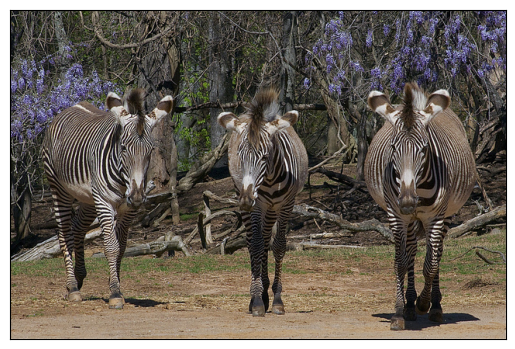

In [57]:
fig, axes = plt.subplots()
axes.imshow(zebras)
axes.set_xticks([])
axes.set_yticks([])
plt.show()

In [ ]:
# the four values defining a COCO bounding box are 
# (top_right_x_coordinate, top_right_y_coordinate, image_width, image_height)
# COCO segmentation list defines a polygon in the format [x_0, y_0, x_1, y_1, x_2, y_2, ........ x_n, y_n]

In [83]:
np.array(zebra_annotations[0].get("segmentation")[0]).reshape(33, 2);

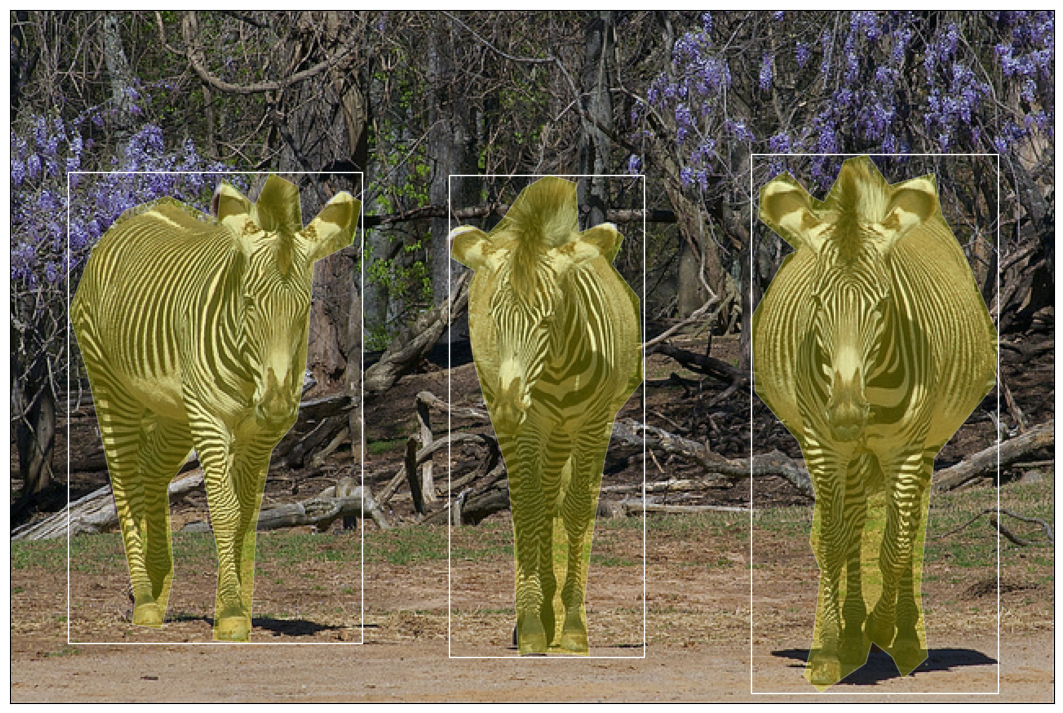

In [89]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 9)
axes.imshow(zebras)
axes.set_xticks([])
axes.set_yticks([])

for ann in zebra_annotations:
    x, y, w, h = ann.get("bbox")
    border = np.array(ann.get("segmentation")[0])
    axes.add_patch(Rectangle((x, y), width=w, height=h, edgecolor="white", facecolor="none"))
    axes.add_patch(Polygon(border.reshape(border.shape[0] // 2, 2), edgecolor="white", facecolor="yellow", alpha=0.25))

plt.show()

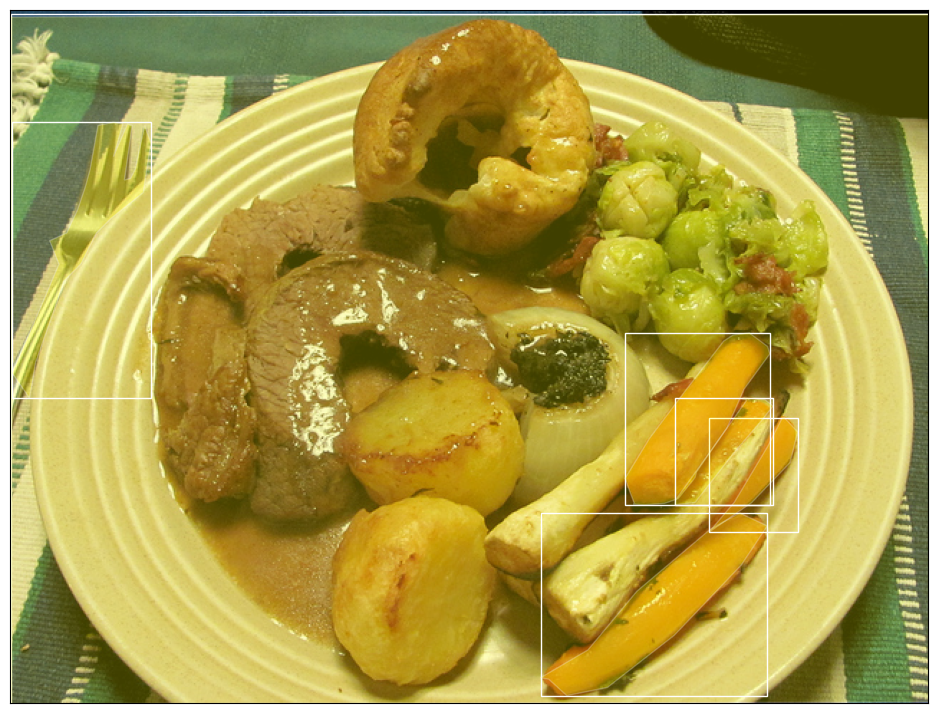

In [92]:
# "\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\000000493799.jpg"

with open(file=r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\000000493799.jpg", mode="rb") as fp:
    plate = np.array(Image.open(fp))
plate_annotations = [_ for _ in annotations if _.get("image_id") == 493799]

fig, axes = plt.subplots()
fig.set_size_inches(16, 9)
axes.imshow(plate)
axes.set_xticks([])
axes.set_yticks([])

for ann in plate_annotations:
    x, y, w, h = ann.get("bbox")
    border = np.array(ann.get("segmentation")[0])
    axes.add_patch(Rectangle((x, y), width=w, height=h, edgecolor="white", facecolor="none"))
    axes.add_patch(Polygon(border.reshape(border.shape[0] // 2, 2), edgecolor="white", facecolor="yellow", alpha=0.25))

plt.show()

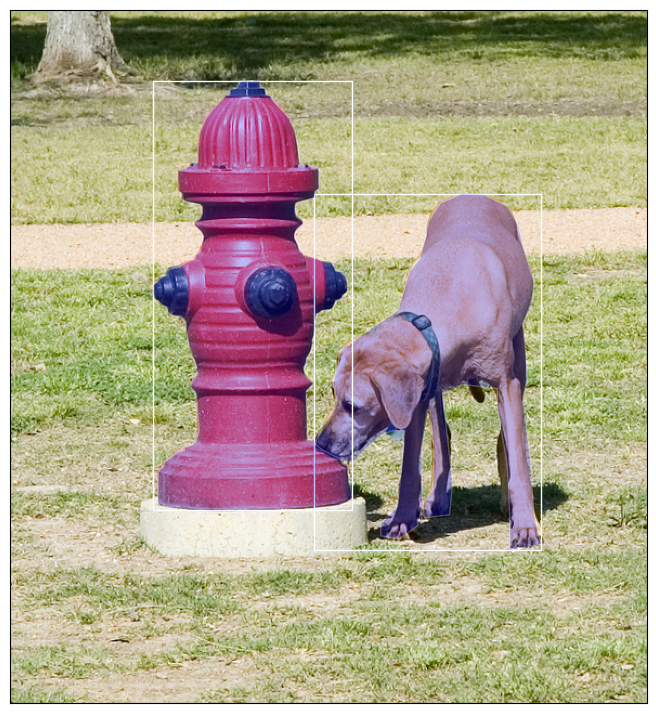

In [94]:
# "\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\000000493799.jpg"

with open(file=r"\\ad.uws.edu.au\dfshare\HomesBNK$\90963425\Downloads\val2017\000000291664.jpg", mode="rb") as fp:
    plate = np.array(Image.open(fp))
plate_annotations = [_ for _ in annotations if _.get("image_id") == 291664]

fig, axes = plt.subplots()
fig.set_size_inches(16, 9)
axes.imshow(plate)
axes.set_xticks([])
axes.set_yticks([])

for ann in plate_annotations:
    x, y, w, h = ann.get("bbox")
    border = np.array(ann.get("segmentation")[0])
    axes.add_patch(Rectangle((x, y), width=w, height=h, edgecolor="white", facecolor="none"))
    axes.add_patch(Polygon(border.reshape(border.shape[0] // 2, 2), edgecolor="white", facecolor="blue", alpha=0.25))

plt.show()